## Model Building

## Creating a logistic regression to predict absenteeism

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

### Load the Data

In [2]:
data_preprocessed = pd.read_csv("Preprocessed.csv")

In [3]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


### Create the target variable

In [4]:
data_preprocessed["Absenteeism Time in Hours"].median()

3.0

#### 3 is our threshold that separates our target variable  

We create two target variable which are **Moderately Absent** and **Excessively Absent**

In [5]:
targets = np.where(data_preprocessed["Absenteeism Time in Hours"] > 3, 1, 0)

In [6]:
targets

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,

In [7]:
data_preprocessed["Excessive Absenteeism"] = targets

In [8]:
data_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [9]:
data_preprocessed["Excessive Absenteeism"].sum() / data_preprocessed["Excessive Absenteeism"].shape[0]

0.45571428571428574

- #### % 45 of the target is 1  it is a good sign for balanced data

In [10]:
data_with_target = data_preprocessed.drop(["Absenteeism Time in Hours"],axis = 1)

In [11]:
data_with_target is data_preprocessed

False

In [12]:
data_with_target.head()

,reason_1,reason_2,reason_3,reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,0


#### Creating input(independent variable dataset)

In [13]:
data_with_target.shape

(700, 15)

In [14]:
unscaled_inputs = data_with_target.iloc[:,:-1]


### Standardize the Data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
unscaled_inputs.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [18]:
columns_to_scale = ['Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index']
dummy_columns = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Education']

In [19]:
input_scale = unscaled_inputs.loc[:,columns_to_scale]

In [20]:
scaled_input = scaler.fit_transform(input_scale)

In [21]:
new_inputs  =  pd.concat([unscaled_inputs.loc[:,dummy_columns],pd.DataFrame(columns = columns_to_scale,data = scaled_input)],axis = 1).values


### Split the data into train & test and shuffle

#### Import the relevant module

In [22]:
from sklearn.model_selection import train_test_split

### Split

In [23]:
x_train,x_test,y_train,y_test =train_test_split(new_inputs,targets,test_size = 0.2,random_state = 20)

In [24]:
print(x_train.shape,y_train.shape)

(560, 12) (560,)


In [25]:
print(x_test.shape,y_test.shape)

(140, 12) (140,)


### Model Building

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
reg = LogisticRegression()

In [28]:
reg.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred = reg.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
print('Accuracy Score is {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy Score is 0.71


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        74
           1       0.72      0.64      0.68        66

    accuracy                           0.71       140
   macro avg       0.72      0.71      0.71       140
weighted avg       0.72      0.71      0.71       140



<AxesSubplot:>

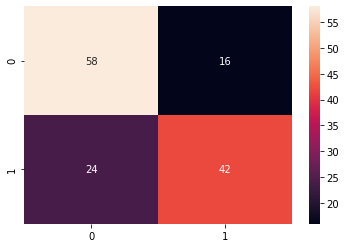

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True )